In [20]:
import pandas as pd
import numpy as np


data = pd.read_csv('/Users/songchenyu/Downloads/wine+quality/winequality-white.csv', sep=';')
print(data.head())

class_labels=[0,1,2,3,4,5,6,7,8,9,10]
print("class_lables:",class_labels)

N = len(data)
p = [] 


#字典，用于存储每个类别的均值向量、协方差矩阵和样本数量
class_stats = {}

for label in class_labels:

    class_data = data[data['quality'] == label]
    features = class_data.iloc[:, :-1]
    mean_vector = np.mean(features, axis=0)
    cov_matrix = np.cov(features, rowvar=False)
    
    num_samples = len(class_data)
    
    class_stats[label] = {
        'mean_vector': mean_vector,
        'cov_matrix': cov_matrix,
        'num_samples': num_samples
    }

for label, stats in class_stats.items():
    print(f"Class {label}:")
    print("Mean Vector:")
    print(stats['mean_vector'])
    print("Covariance Matrix:")
    print(stats['cov_matrix'])
    print(f"Number of Samples: {stats['num_samples']}")
    print()


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/var/folders/vc/hp1kfbmj7lb7k9nhyd12slww0000gn/T/ipykernel_4083/1792426957.py:35: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.cov(features, rowvar=False)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [21]:
###正则化，这里应该不需要；下一个数据集需要
def calculate_cov_matrix(features, regularization_parameter):
    cov_matrix = np.cov(features, rowvar=False)
    cov_matrix_regularized = cov_matrix + regularization_parameter * np.identity(cov_matrix.shape[0])
    return cov_matrix_regularized

regularization_parameter = 0.01  # 调整正则化参数的值
class_stats = {}

for label in class_labels:
    class_data = data[data['quality'] == label]
    features = class_data.iloc[:, :-1]
    mean_vector = np.mean(features, axis=0)
    cov_matrix_regularized = calculate_cov_matrix(features, regularization_parameter)
    num_samples = len(class_data)
    
    class_stats[label] = {
        'mean_vector': mean_vector,
        'cov_matrix': cov_matrix_regularized,
        'num_samples': num_samples
    }


/var/folders/vc/hp1kfbmj7lb7k9nhyd12slww0000gn/T/ipykernel_4083/918631896.py:3: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_matrix = np.cov(features, rowvar=False)


In [22]:
def calculate_posterior(sample, mean_vector, cov_matrix, prior, num_samples):
    # 计算后验概率
    likelihood = (1 / ((2 * np.pi) ** (len(sample) / 2) * np.linalg.det(cov_matrix) ** 0.5)) * \
                np.exp(-0.5 * (sample - mean_vector).T @ np.linalg.inv(cov_matrix) @ (sample - mean_vector))
    posterior = likelihood * prior / (num_samples / N)
    return posterior

def bayesian_classifier(sample, class_stats):
    max_posterior = -1
    predicted_class = None
    
    for label, stats in class_stats.items():
        prior = stats['num_samples'] / N
        posterior = calculate_posterior(sample, stats['mean_vector'], stats['cov_matrix'], prior, stats['num_samples'])
        
        if posterior > max_posterior:
            max_posterior = posterior
            predicted_class = label
    
    return predicted_class

# 初始化变量以跟踪错误
total_samples = 0
total_errors = 0

# 对每个样本应用贝叶斯分类器
predicted_labels = []
for _, row in data.iterrows():
    sample = row[:-1]  # 去掉最后一列（类别标签）
    true_label = row[-1]  # 真实类别标签
    predicted_label = bayesian_classifier(sample, class_stats)
    predicted_labels.append(predicted_label)
    
    # 检查是否预测正确
    if true_label != predicted_label:
        total_errors += 1

    total_samples += 1

# 误差率估计
error_rate = total_errors / total_samples
print(f"Total errors: {total_errors}")
print(f"Error rate: {error_rate:.4f}")



# 将预测结果与真实标签进行比较
true_labels = data['quality'].tolist()
correct_predictions = np.sum(np.array(predicted_labels) == np.array(true_labels))
accuracy = correct_predictions / N

print(f"Accuracy: {accuracy:.2%}")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Total errors: 3015
Error rate: 0.6156
Accuracy: 38.44%


In [27]:
confusion_matrix = np.zeros((11, 11, 4), dtype=int)
print(confusion_matrix.shape)
num_classes=11
        
for true_label, predicted_label in zip(true_labels, predicted_labels):
    confusion_matrix[true_label, predicted_label, 0] += 1

# 打印混淆矩阵
print("Confusion Matrix:")
for true_label in range(num_classes):
    for predicted_label in range(num_classes):
        count = confusion_matrix[true_label, predicted_label, 0]
        print(f"True Label {true_label} - Predicted Label {predicted_label}: {count}")


(11, 11, 4)
Confusion Matrix:
True Label 0 - Predicted Label 0: 0
True Label 0 - Predicted Label 1: 0
True Label 0 - Predicted Label 2: 0
True Label 0 - Predicted Label 3: 0
True Label 0 - Predicted Label 4: 0
True Label 0 - Predicted Label 5: 0
True Label 0 - Predicted Label 6: 0
True Label 0 - Predicted Label 7: 0
True Label 0 - Predicted Label 8: 0
True Label 0 - Predicted Label 9: 0
True Label 0 - Predicted Label 10: 0
True Label 1 - Predicted Label 0: 0
True Label 1 - Predicted Label 1: 0
True Label 1 - Predicted Label 2: 0
True Label 1 - Predicted Label 3: 0
True Label 1 - Predicted Label 4: 0
True Label 1 - Predicted Label 5: 0
True Label 1 - Predicted Label 6: 0
True Label 1 - Predicted Label 7: 0
True Label 1 - Predicted Label 8: 0
True Label 1 - Predicted Label 9: 0
True Label 1 - Predicted Label 10: 0
True Label 2 - Predicted Label 0: 0
True Label 2 - Predicted Label 1: 0
True Label 2 - Predicted Label 2: 0
True Label 2 - Predicted Label 3: 0
True Label 2 - Predicted Label 4

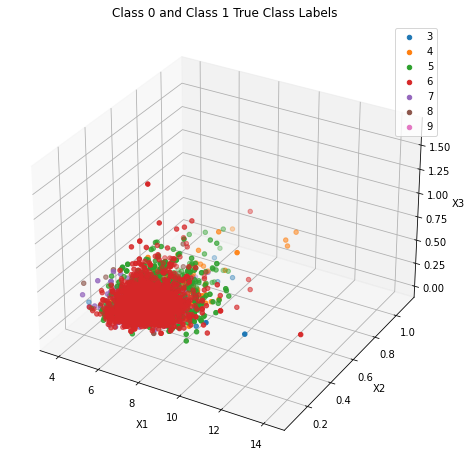

In [24]:
# 绘制数据
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 8))

for label in class_labels:
    class_data = data[data['quality'] == label]
    if not class_data.empty:
        ax = fig.gca(projection='3d')
        class_data =class_data.values
        ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2],label=label)

ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Class 0 and Class 1 True Class Labels')
plt.show()


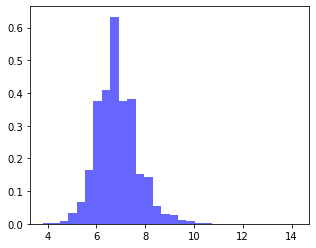

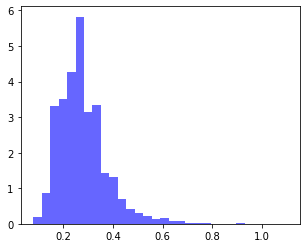

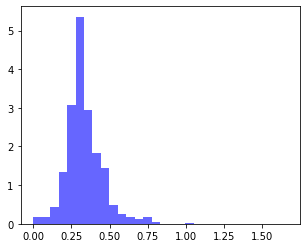

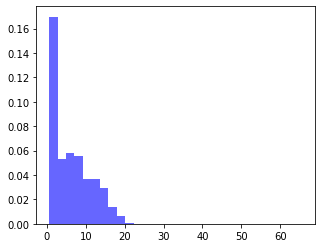

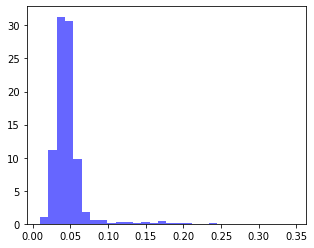

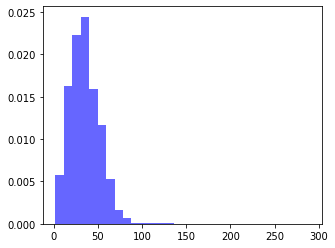

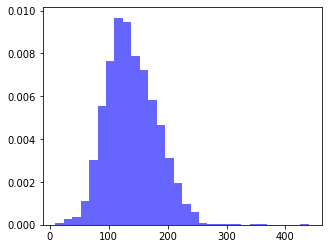

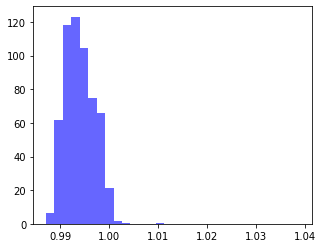

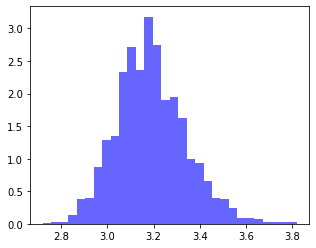

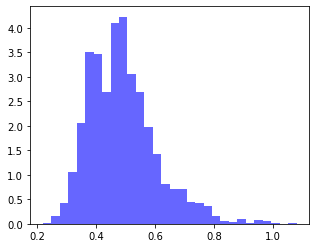

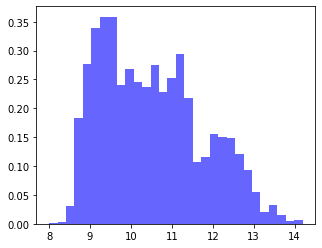

In [42]:
#Check the feature data distribution of each dimension in the data set and try to fit it with Gaussian function
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
for i in range(11):
    fig = plt.figure(figsize=(5, 4))
    column = data_array[:, i]

#     mu, std = stats.norm.fit(data)
#     xmin, xmax = plt.xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = stats.norm.pdf(x, mu, std)
#     plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

#     plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
#     plt.legend()
    
    
    plt.hist(column, bins=30, density=True, alpha=0.6, color='b', label='Data')
    
    plt.savefig(str(i+1)+'-th feature distribution.png') 
    plt.show()

